In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from math import sqrt

#imports locais
sns.set

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

## Funções para resolução do sistema

In [2]:
def eliminacao_gauss(matriz, dimensao, b):
    x = []
    for i in range(dimensao):
        x.append(1)

    for k in range(0, dimensao - 1  ):
        i = k+1
        for i in range(k+1, dimensao ):
            m = matriz[i][k]/matriz[k][k]
            matriz[i][k] = 0
            j = k+1
            for j in range(k+1, dimensao):
                matriz[i][j] = matriz[i][j] - (m * matriz[k][j])

            b[i] = b[i] - m * b[k]


    x[dimensao - 1] = b[dimensao-1] / matriz[dimensao-1][dimensao-1]
    for i in range(dimensao-2, -1, -1):
        soma = 0
        for j in range(i+1, dimensao):
            soma = soma + matriz[i][j] * x[j]

        x[i] = (b[i] - soma)/matriz[i][i]

    return x, matriz

In [3]:
def calc_erro(x_atual,x_ant, err_list):
    num = []
    for i in range (len(x_atual)):
        num.append(abs(x_atual[i] - x_ant[i]))

    err = max(num)/abs(max(x_atual))
    err_list.append(err)
    return err


In [4]:

def gaussSeidel(matriz, b, tol , stop ):
    err_list = []
    x_ant = []
    x_atual = []
    for i in range(len(b)):
        x_ant.append(0) 
        x_atual.append(0)

    k = 1
    while(k <= stop):
        for i in range(0,len(b)):
            alpha = 0
            for j in range(0, i):
                alpha = alpha + matriz[i][j] * x_atual[j]
            for j in range(i+1, len(b)):
                alpha = alpha + matriz[i][j] * x_ant[j]
            x_atual[i] = (b[i] - alpha) / matriz[i][i]
        
        if( abs(calc_erro(x_atual,x_ant, err_list)) < tol):
            return x_atual, err_list
        for i in range(len(x_atual)):
            x_ant[i] = x_atual[i]
        k = k+1

    print('numero de iteracoes expirados')
    return x_atual, err_list


## Criando um dataframe com a base de dados

In [5]:
df = pd.read_csv('input/machine.data',  header=None)

In [6]:
df.columns = ['vendon_names','model','MYCT','MMIN', 'MMAX', 'CACH','CHMIN', 'CHMAX', 'PRP', 'ERP']

10 primeiros itens do dataset

In [8]:
df.head(10)

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,125,256,6000,256,16,128,198
1,29,8000,32000,32,8,32,269
2,29,8000,32000,32,8,32,220
3,29,8000,32000,32,8,32,172
4,29,8000,16000,32,8,16,132
5,26,8000,32000,64,8,32,318
6,23,16000,32000,64,16,32,367
7,23,16000,32000,64,16,32,489
8,23,16000,64000,64,16,32,636
9,23,32000,64000,128,32,64,1144


In [7]:
df = df.drop(columns=['vendon_names', 'model'])
df.shape
df_y = df['ERP']
df = df.drop(columns=['ERP'])
df_x = df

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_x.values, df_y.values, test_size=0.3, random_state=1 )

In [11]:
X_train.shape

(146, 7)

In [12]:
X_train.transpose()

array([[  220,   160,   110, ...,   175,    92,    50],
       [ 1000,  1000,  1000, ...,   256,  2000,  1000],
       [ 8000,  8000, 12000, ...,  2000,  8000,  4000],
       ...,
       [    1,     1,     1, ...,     3,     1,     1],
       [    2,    14,     2, ...,    24,     6,     5],
       [   71,    60,    60, ...,    22,    62,    29]], dtype=int64)

In [13]:
G_GT =  np.dot(X_train.transpose(), X_train)

In [14]:
G_GT

array([[   12762310,    33431546,   181139080,      252724,       58413,
             323306,     1235930],
       [   33431546,  3806430692, 11161471096,    25359954,     4171916,
           13029800,   135196684],
       [  181139080, 11161471096, 45868479088,    90819716,    15327624,
           65133624,   491369028],
       [     252724,    25359954,    90819716,      377101,       41800,
             159300,     1164368],
       [      58413,     4171916,    15327624,       41800,        9243,
              27221,      180454],
       [     323306,    13029800,    65133624,      159300,       27221,
             179784,      785159],
       [    1235930,   135196684,   491369028,     1164368,      180454,
             785159,     6482269]], dtype=int64)

In [15]:
GT_y = np.dot(X_train.transpose(),y_train)

In [22]:
alphas, err_list = gaussSeidel(G_GT, GT_y, 0.00000005, 500000)

In [23]:
y_predict = []
mult = []
for test in X_test:
    for i in range(len(alphas)):
        mult.append(test[i] * alphas[i])
    y_predict.append(sum(mult))
    mult.clear()

In [24]:
y_predict

[77.73420146416437,
 92.28767674887425,
 14.784368903411314,
 32.757419356900456,
 214.06899303994004,
 162.52452327408767,
 78.5376734599559,
 152.94888004134873,
 201.87169704415695,
 159.3352590054709,
 37.59256911148748,
 157.91373550750447,
 18.43952829499138,
 29.73538195889632,
 101.98896545390917,
 218.44591035272308,
 24.787908488954756,
 19.560698338199956,
 73.97284165070964,
 138.09618431900526,
 16.60055356172767,
 292.54673378391107,
 47.80112609652089,
 29.65938796249883,
 44.965019877161616,
 21.07478344735476,
 33.63898120796098,
 121.74925227208082,
 26.544943898688192,
 218.9390323591601,
 -2.313325877236357,
 23.707249220212923,
 15.086468452572863,
 64.76060101135828,
 18.910911640866843,
 466.2662180869789,
 202.46817779444748,
 43.211214717662735,
 23.131530655905657,
 384.42128957729676,
 364.49009813384697,
 38.72320194892127,
 33.74981322497584,
 83.08582195232566,
 141.49252351579088,
 275.0714308566691,
 93.8006926498892,
 12.208803586294625,
 17.52742359158

In [25]:
error = sqrt(mean_squared_error(y_test,y_predict))

In [26]:
error

40.13567967028691

In [28]:
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train)
X_train_1d = []
for element in X_train_pca:
    X_train_1d.append(element[0])

In [29]:
X_train_1d

[-4874.901477067764,
 -4874.635444137959,
 -1007.5186626483597,
 -8743.046215070892,
 -4875.232419934616,
 20118.356235242834,
 -8866.873776318944,
 -8486.614821686335,
 18582.934552034825,
 3115.08683194458,
 -7899.724817620526,
 20118.988665904235,
 22165.535931366427,
 11362.086944535346,
 -5000.639135247872,
 12383.255480209971,
 -11831.766314463099,
 -751.3745167967206,
 -8741.553390913483,
 4649.982326414241,
 -751.600141898225,
 -12347.062171124458,
 -4874.660568028837,
 -8866.877213362239,
 51063.94715841153,
 -4617.995064142416,
 -10800.68467798437,
 -11646.97017134168,
 4648.968472500933,
 -4107.767251634928,
 3626.957323166296,
 -8742.572614537945,
 -4106.550793522731,
 -4618.963155877872,
 3627.2874810651765,
 -4618.786404651717,
 2857.909006962801,
 -5001.293570656152,
 3627.12051273214,
 -4874.328538136779,
 2858.2428691775267,
 -10740.815035763633,
 -10802.415745486882,
 3628.424549244554,
 18583.136833106382,
 -4618.925974471922,
 -8742.34054985568,
 -4619.393808599998,

C:\Users\joao_\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


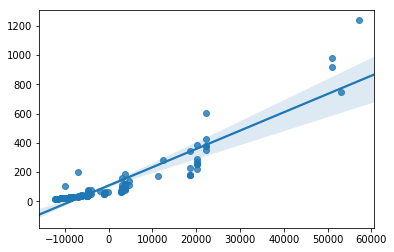

In [30]:
sns.regplot(x=X_train_1d, y=y_train, data=df)